In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 df = pd.read_excel("Experiment1_modified(0.5-2).xlsx")
 df

,Animal ID,Group,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL),Insulin Level
0,1,ST,0,88,100,0.146,Low
1,2,ST,0,102,78,0.172,Low
2,3,ST,0,103,92,0.159,Low
3,4,ST,0,104,44,0.228,Low
4,5,ST,0,92,66,0.163,Low
...,...,...,...,...,...,...,...
211,32,RN,120,107,27,0.528,Medium
212,33,RN,120,101,45,0.602,Medium
213,34,RN,120,112,28,0.370,Low
214,35,RN,120,110,66,0.684,Medium


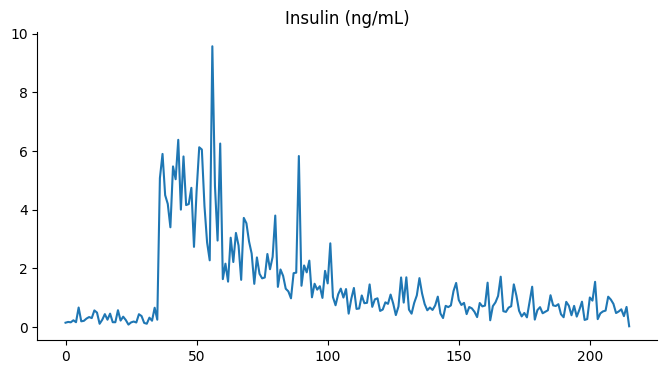

In [ ]:
# @title Insulin (ng/mL)

from matplotlib import pyplot as plt
df['Insulin (ng/mL)'].plot(kind='line', figsize=(8, 4), title='Insulin (ng/mL)')
plt.gca().spines[['top', 'right']].set_visible(False)

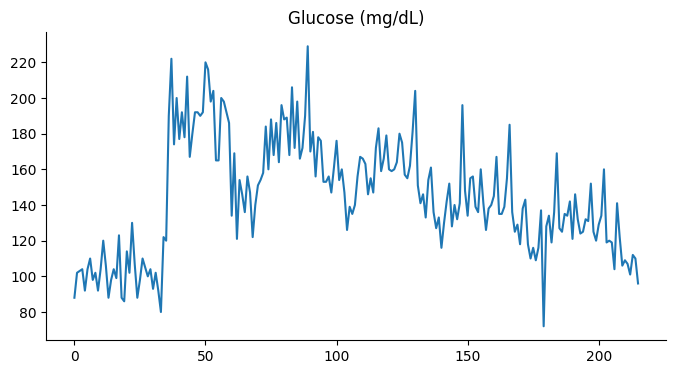

In [ ]:
# @title Glucose (mg/dL)

from matplotlib import pyplot as plt
df['Glucose (mg/dL)'].plot(kind='line', figsize=(8, 4), title='Glucose (mg/dL)')
plt.gca().spines[['top', 'right']].set_visible(False)

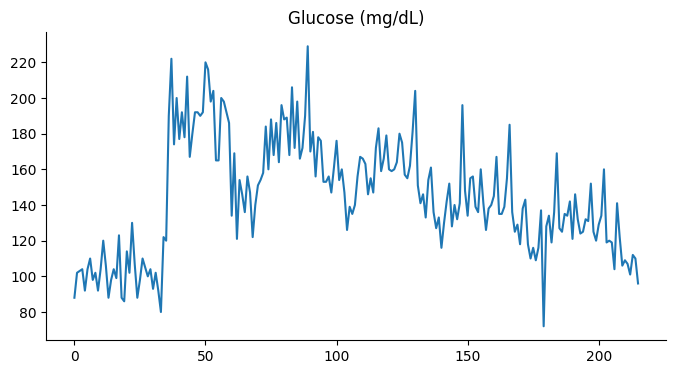

In [ ]:
# @title Glucose (mg/dL)

from matplotlib import pyplot as plt
df['Glucose (mg/dL)'].plot(kind='line', figsize=(8, 4), title='Glucose (mg/dL)')
plt.gca().spines[['top', 'right']].set_visible(False)

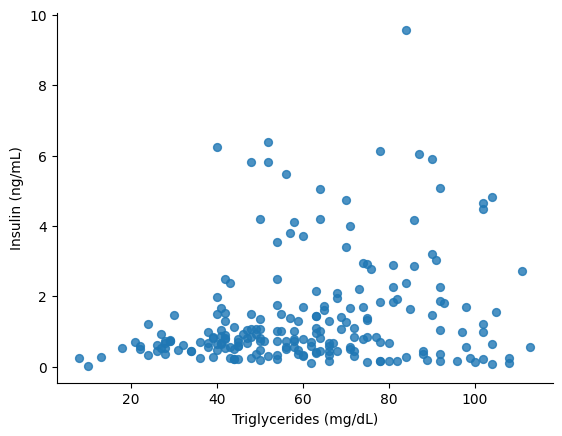

In [ ]:
# @title Triglycerides (mg/dL) vs Insulin (ng/mL)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Triglycerides (mg/dL)', y='Insulin (ng/mL)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

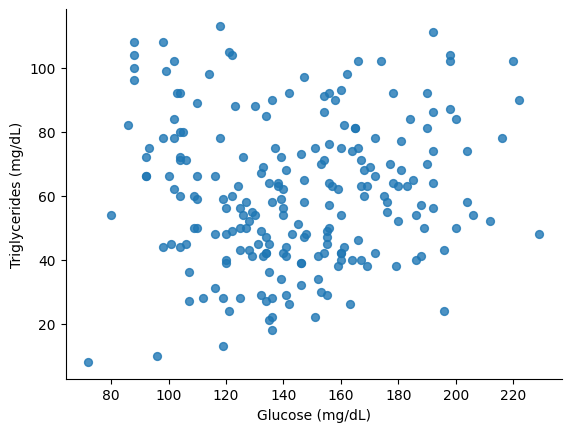

In [ ]:
# @title Glucose (mg/dL) vs Triglycerides (mg/dL)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Glucose (mg/dL)', y='Triglycerides (mg/dL)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df = df.drop(columns='Animal ID')
df = df.drop(columns='Group')
df

,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL),Insulin Level
0,0,88,100,0.146,Low
1,0,102,78,0.172,Low
2,0,103,92,0.159,Low
3,0,104,44,0.228,Low
4,0,92,66,0.163,Low
...,...,...,...,...,...
211,120,107,27,0.528,Medium
212,120,101,45,0.602,Medium
213,120,112,28,0.370,Low
214,120,110,66,0.684,Medium


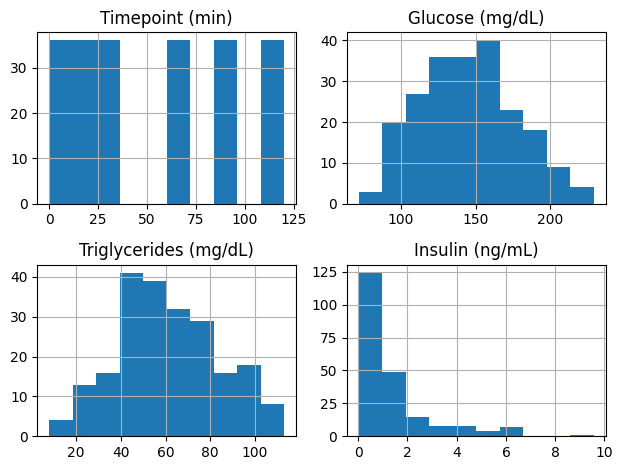

In [ ]:
df.hist()
plt.tight_layout()

In [ ]:
x = df.drop(columns='Insulin Level')
y = df['Insulin Level']


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
smote = SMOTE(random_state = 42)
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_resampled))


Counter({'Medium': 91, 'Low': 48, 'High': 33})
Counter({'Medium': 91, 'Low': 91, 'High': 91})


<Axes: >

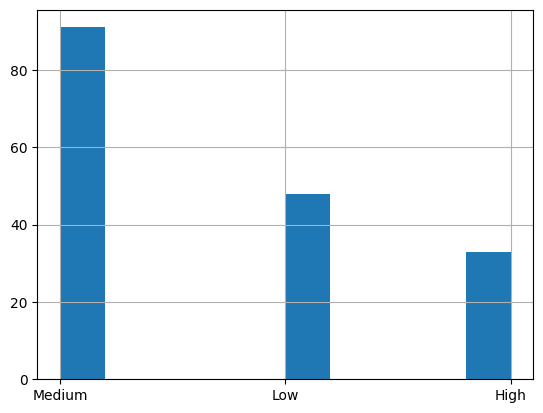

In [ ]:
y_train.hist()

<Axes: >

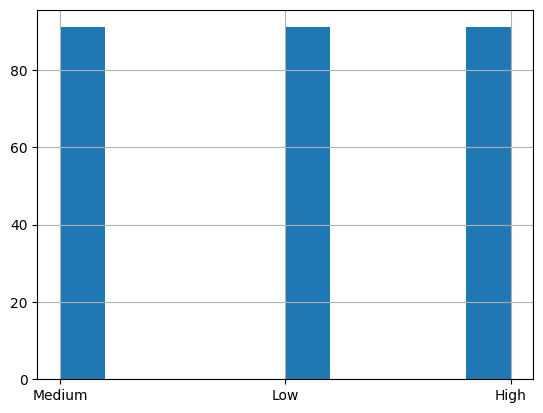

In [ ]:
y_train_resampled.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_val = ['Glucose (mg/dL)','Triglycerides (mg/dL)','Insulin (ng/mL)']
df[numerical_val] = scaler.fit_transform(df[numerical_val])
df


,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL),Insulin Level
0,0,0.101911,0.876190,0.012776,Low
1,0,0.191083,0.666667,0.015499,Low
2,0,0.197452,0.800000,0.014138,Low
3,0,0.203822,0.342857,0.021363,Low
4,0,0.127389,0.552381,0.014556,Low
...,...,...,...,...,...
211,120,0.222930,0.180952,0.052780,Medium
212,120,0.184713,0.352381,0.060530,Medium
213,120,0.254777,0.190476,0.036234,Low
214,120,0.242038,0.552381,0.069117,Medium


In [ ]:
df

,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL),Insulin Level
0,0,0.101911,0.876190,0.012776,Low
1,0,0.191083,0.666667,0.015499,Low
2,0,0.197452,0.800000,0.014138,Low
3,0,0.203822,0.342857,0.021363,Low
4,0,0.127389,0.552381,0.014556,Low
...,...,...,...,...,...
211,120,0.222930,0.180952,0.052780,Medium
212,120,0.184713,0.352381,0.060530,Medium
213,120,0.254777,0.190476,0.036234,Low
214,120,0.242038,0.552381,0.069117,Medium


array([[<Axes: title={'center': 'Timepoint (min)'}>,
        <Axes: title={'center': 'Glucose (mg/dL)'}>],
       [<Axes: title={'center': 'Triglycerides (mg/dL)'}>,
        <Axes: title={'center': 'Insulin (ng/mL)'}>]], dtype=object)

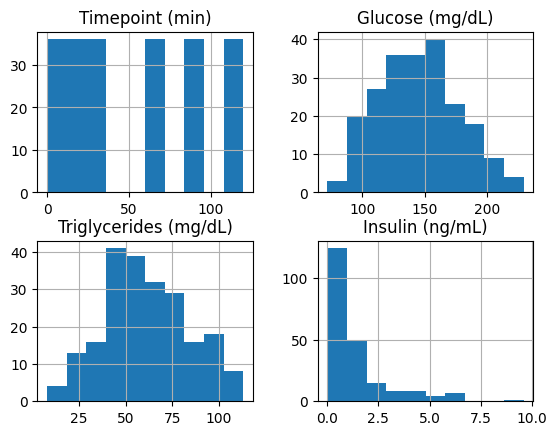

In [ ]:
x.hist()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
Rmodel = RandomForestClassifier(n_estimators=2000)
Rmodel.fit(x_train_resampled,y_train_resampled)



RandomForestClassifier(n_estimators=2000)

In [ ]:
Rpredict = Rmodel.predict(x_test)
Rpredict

array(['Medium', 'High', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium'], dtype=object)

In [ ]:
Dmodel = DecisionTreeClassifier()
Dmodel.fit(x_train_resampled,y_train_resampled)
Dpredict = Dmodel.predict(x_test)
Dpredict

array(['Medium', 'High', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium'], dtype=object)

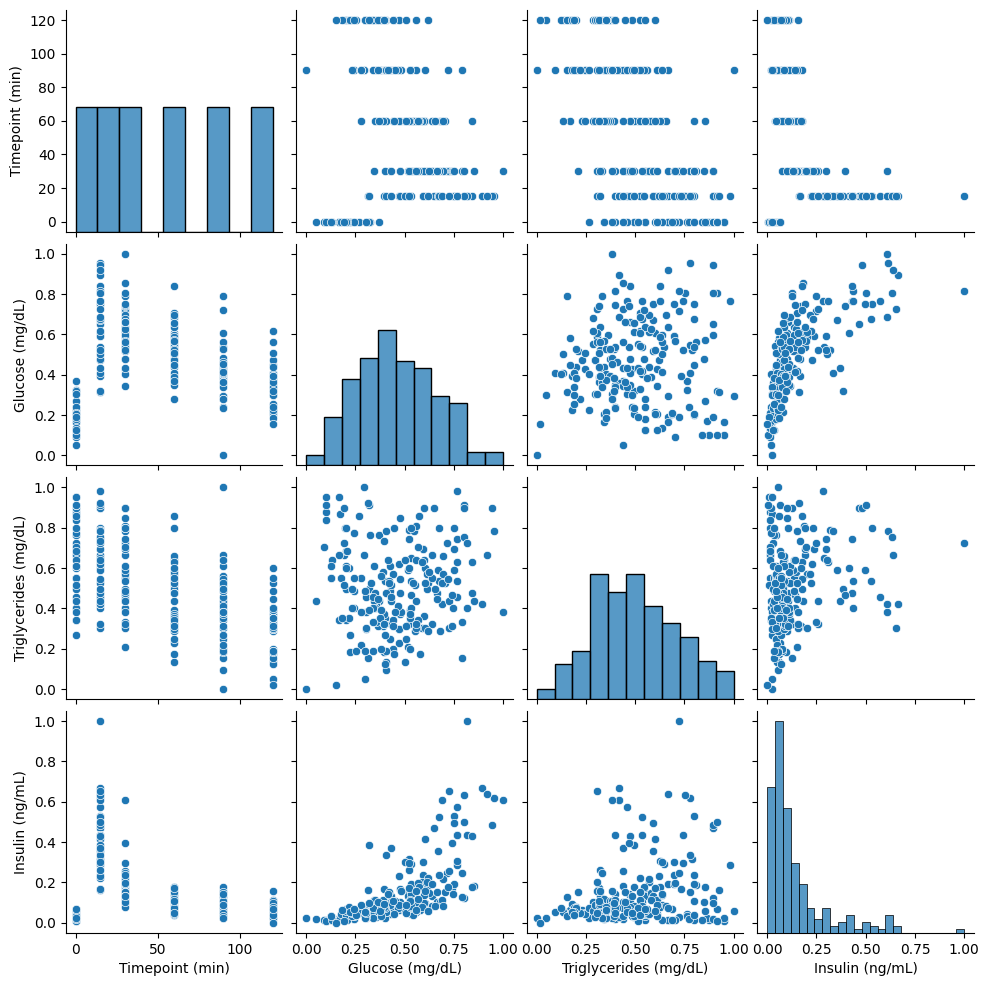

In [ ]:
sns.pairplot(df)

In [ ]:
Kmodel = KNeighborsClassifier(n_neighbors=3)
Kmodel.fit(x_train_resampled,y_train_resampled)
Kpredict = Kmodel.predict(x_test)
Kpredict

array(['Medium', 'High', 'Medium', 'Low', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'High', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium'], dtype=object)

In [ ]:
x

,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL)
0,0,88,100,0.146
1,0,102,78,0.172
2,0,103,92,0.159
3,0,104,44,0.228
4,0,92,66,0.163
...,...,...,...,...
211,120,107,27,0.528
212,120,101,45,0.602
213,120,112,28,0.370
214,120,110,66,0.684


In [ ]:
y

,Insulin Level
0,Low
1,Low
2,Low
3,Low
4,Low
...,...
211,Medium
212,Medium
213,Low
214,Medium


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
Rscore = accuracy_score(y_test,Rpredict)*100
Rscore

100.0

In [ ]:
Dscore = accuracy_score(y_test,Dpredict)*100
Dscore

100.0

In [ ]:
Kscore = accuracy_score(y_test,Kpredict)*100
Kscore

79.54545454545455

# **Precision Score**

Random Forest

In [ ]:
rps = precision_score(y_test, Rpredict, average='macro')*100
rps

100.0

Decision Tree

In [ ]:
dps = precision_score(y_test, Dpredict, average='macro')*100
dps

100.0

KNN

In [ ]:
ps = precision_score(y_test, Kpredict, average='macro')*100
ps

74.40476190476191

# **Recall Score**

In [ ]:
Rrc = recall_score(y_test, Rpredict, average='macro')*100
Drc = recall_score(y_test, Dpredict, average='macro')*100
Krc = recall_score(y_test, Kpredict, average='macro')*100

In [ ]:
Rrc

100.0

In [ ]:
Drc

100.0

In [ ]:
Krc

74.40476190476191

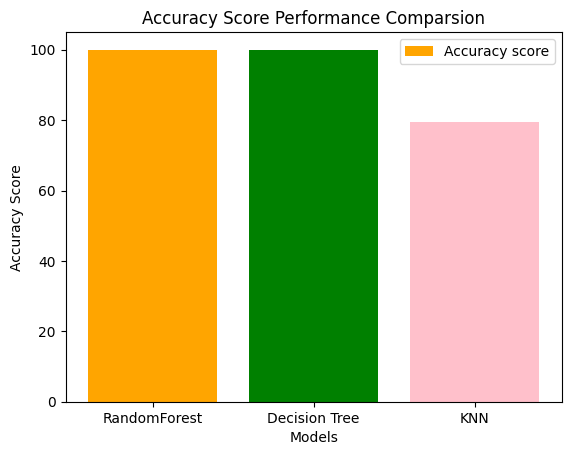

In [ ]:
Model =["RandomForest","Decision Tree","KNN"]
Score = [Rscore,Dscore,Kscore]
plt.title('Accuracy Score Performance Comparsion')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.bar(Model,Score,label='Accuracy score',color=['orange','green','pink'])
plt.legend()
plt.show()